In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from pathlib import Path

In [2]:
df_raw = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Food_Inflation_Project\All India Consumer Price Index.csv")

In [3]:
df_india = df_raw[df_raw["Sector"] == "Rural+Urban"].copy()

In [4]:
month_map = {
    "Jan": "January", "Jan.": "January",
    "Feb": "February", "Feb.": "February",
    "Mar": "March", "Mar.": "March", "Marcrh": "March", "Mrach": "March",
    "Apr": "April", "Apr.": "April",
    "May.": "May",
    "Jun": "June", "Jun.": "June",
    "Jul": "July", "Jul.": "July",
    "Aug": "August", "Aug.": "August",
    "Sep": "September", "Sept": "September", "Sept.": "September",
    "Oct": "October", "Oct.": "October",
    "Nov": "November", "Nov.": "November",
    "Dec": "December", "Dec.": "December",
}

In [5]:
df_india["Month"] = df_india["Month"].astype(str).str.strip().str.title()
df_india["Month"] = df_india["Month"].replace(month_map)

In [6]:
month_to_num = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}
df_india["MonthNum"] = df_india["Month"].map(month_to_num)

In [7]:
df_india["Date"] = pd.to_datetime({
    "year": df_india["Year"].astype(int),
    "month": df_india["MonthNum"].astype(int),
    "day": 1
})
df_india = df_india.sort_values("Date")

In [8]:
food_cols = [
    "Cereals and products", "Meat and fish", "Egg",
    "Milk and products", "Oils and fats", "Fruits", "Vegetables"
]
df_food = df_india[["Date"] + food_cols].reset_index(drop=True)

In [9]:
print("Cleaned Food CPI (first 20 rows) — fixed months")
df_food.head(20)

Cleaned Food CPI (first 20 rows) — fixed months


,Date,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables
0,2013-01-01,108.4,107.3,110.0,104.4,105.1,103.2,102.2
1,2013-02-01,110.4,110.2,112.8,104.9,105.5,103.6,103.2
2,2013-03-01,111.4,109.7,111.2,105.1,104.9,105.3,102.2
3,2013-04-01,111.6,110.9,106.6,105.7,104.4,108.9,105.5
4,2013-05-01,112.3,111.3,104.7,106.8,103.9,109.3,112.9
5,2013-06-01,113.8,114.9,109.8,107.9,104.2,110.7,126.7
6,2013-07-01,114.8,116.4,111.9,108.9,104.3,111.7,140.0
7,2013-08-01,115.6,117.2,111.7,109.6,104.5,109.8,151.8
8,2013-09-01,116.4,116.9,112.3,110.5,105.3,107.3,160.9
9,2013-10-01,117.1,116.3,113.3,111.2,105.7,109.9,171.2


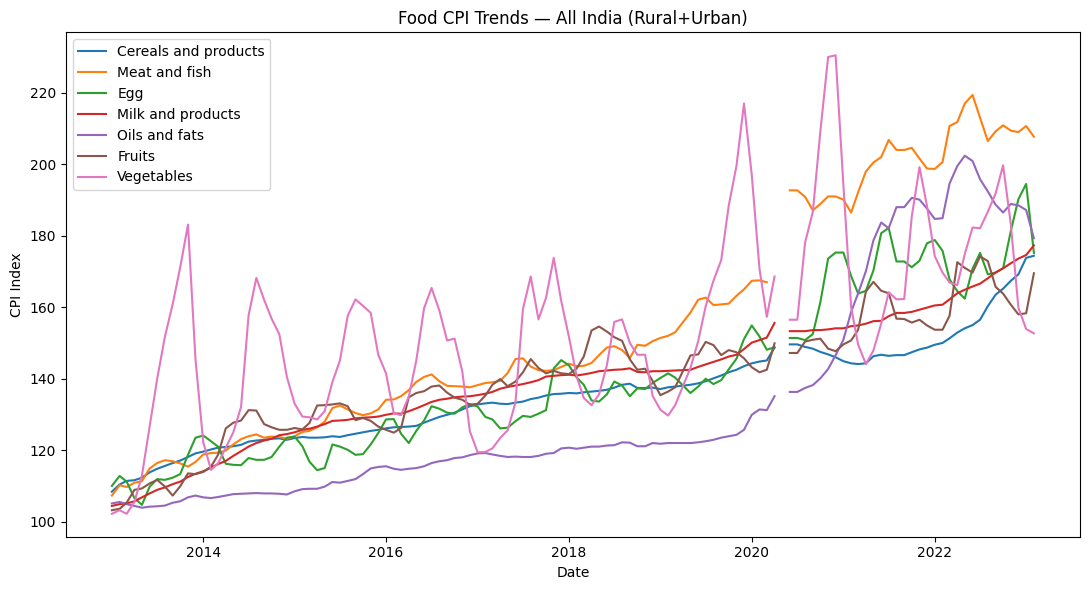

In [19]:
plt.figure(figsize=(11, 6))
for col in food_cols:
    plt.plot(df_food["Date"], df_food[col], label=col)
plt.title("Food CPI Trends — All India (Rural+Urban)")
plt.xlabel("Date")
plt.ylabel("CPI Index")
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
clean_csv = Path(r"C:\Users\Admin\OneDrive\Desktop\Food_Inflation_Project\cleaned_food.csv")
df_food.to_csv(clean_csv, index=False)

In [23]:
df_long = df_food.melt(id_vars=["Date"], var_name="Category", value_name="CPI")
df_long["Year"] = df_long["Date"].dt.year
df_long["Month"] = df_long["Date"].dt.month

long_csv = Path(r"C:\Users\Admin\OneDrive\Desktop\Food_Inflation_Project\cleaned_food_long.csv")
df_food.to_csv(long_csv, index=False)

In [25]:
db_path = Path(r"C:\Users\Admin\OneDrive\Desktop\Food_Inflation_Project.db")
conn = sqlite3.connect(db_path)
df_long.to_sql("food_cpi_long", conn, if_exists="replace", index=False)

847

In [27]:
#latest month in table

In [29]:
q_latest = "SELECT MAX(Date) AS latest_month FROM food_cpi_long;"
latest_df = pd.read_sql(q_latest, conn)

In [31]:
#Average CPI by category for the most rrecent year

In [33]:
max_year = int(df_long["Year"].max())
q_avg_by_cat = f"""
SELECT Category, ROUND(AVG(CPI), 2) AS avg_cpi_{max_year}
FROM food_cpi_long
WHERE Year = {max_year}
GROUP BY Category
ORDER BY avg_cpi_{max_year} DESC;
"""
avg_by_cat_df = pd.read_sql(q_avg_by_cat, conn)

In [35]:
#Year-over-Year % change ( last 12 months)

In [37]:
q_yoy = f"""
WITH yoy AS (
  SELECT
    Category,
    Date,
    CPI,
    LAG(CPI, 12) OVER (PARTITION BY Category ORDER BY Date) AS cpi_12m_ago
  FROM food_cpi_long
)
SELECT
  Category,
  Date,
  ROUND(100.0 * (CPI - cpi_12m_ago) / NULLIF(cpi_12m_ago, 0), 2) AS yoy_percent
FROM yoy
WHERE Date >= DATE((SELECT MAX(Date) FROM food_cpi_long), '-365 day')
ORDER BY Category, Date;
"""
yoy_df = pd.read_sql(q_yoy, conn)
conn.close()

In [39]:
yoy_df.head(10)

,Category,Date,yoy_percent
0,Cereals and products,2022-02-01 00:00:00,3.95
1,Cereals and products,2022-03-01 00:00:00,5.00
2,Cereals and products,2022-04-01 00:00:00,5.96
3,Cereals and products,2022-05-01 00:00:00,5.33
4,Cereals and products,2022-06-01 00:00:00,5.66
5,Cereals and products,2022-07-01 00:00:00,6.90
6,Cereals and products,2022-08-01 00:00:00,9.35
7,Cereals and products,2022-09-01 00:00:00,11.53
8,Cereals and products,2022-10-01 00:00:00,12.08
9,Cereals and products,2022-11-01 00:00:00,12.96


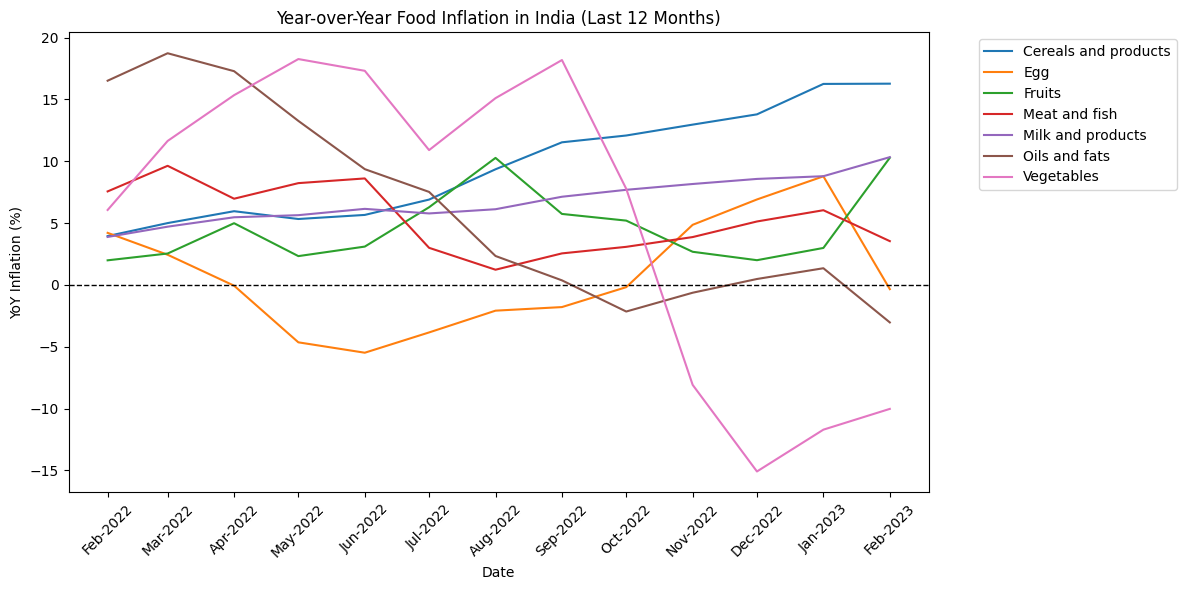

In [60]:
yoy_df["Date"] = pd.to_datetime(yoy_df["Date"])

import matplotlib.dates as mdates
plt.figure(figsize=(12,6))

for cat in yoy_df["Category"].unique():
    subset = yoy_df[yoy_df["Category"] == cat]
    plt.plot(subset["Date"], subset["yoy_percent"], label=cat)

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Year-over-Year Food Inflation in India (Last 12 Months)")
plt.xlabel("Date")
plt.ylabel("YoY Inflation (%)")

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # e.g., Feb-2022
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.xticks(rotation=45)  # Rotate labels to avoid overlap

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("YoY_Food_Inflation.png", dpi=300, bbox_inches="tight")
plt.show()

In [42]:
#Heatmap of YoY Inflation

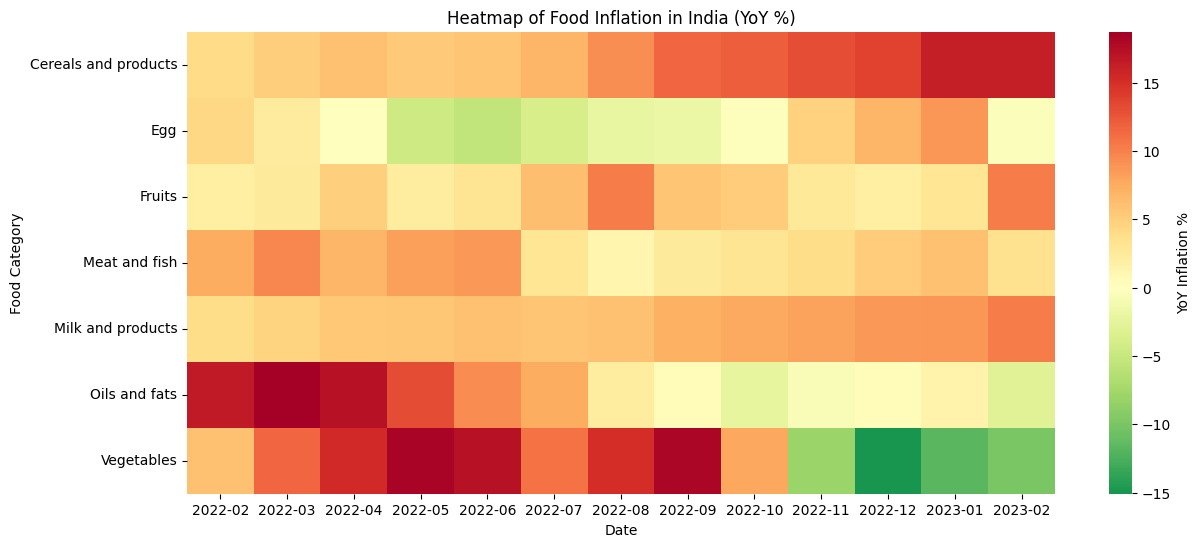

In [62]:
import seaborn as sns

# Pivot data for heatmap
heatmap_df = yoy_df.pivot_table(index="Category", columns="Date", values="yoy_percent")

heatmap_df.columns = heatmap_df.columns.strftime('%Y-%m')

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_df, cmap="RdYlGn_r", center=0, annot=False, cbar_kws={'label': 'YoY Inflation %'})
plt.title("Heatmap of Food Inflation in India (YoY %)")
plt.xlabel("Date")
plt.ylabel("Food Category")
plt.savefig("YoY_HEATMAP.png", dpi=300, bbox_inches="tight")
plt.show()

In [46]:
#Top 5 Most Inflationary Categoies(Bar Chart)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9256\2243474452.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cats.values, y=top_cats.index, palette="Reds_r")


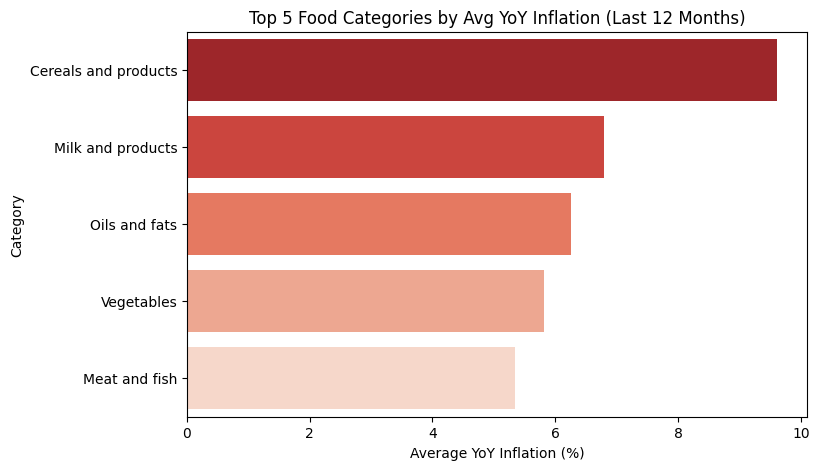

In [58]:
top_cats = (
    yoy_df.groupby("Category")["yoy_percent"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cats.values, y=top_cats.index, palette="Reds_r")
plt.title("Top 5 Food Categories by Avg YoY Inflation (Last 12 Months)")
plt.xlabel("Average YoY Inflation (%)")
plt.ylabel("Category")
plt.savefig("top_5_food_categoies_inflation.png", dpi=300, bbox_inches="tight")
plt.show()

In [48]:
#Trend for Selected Categories

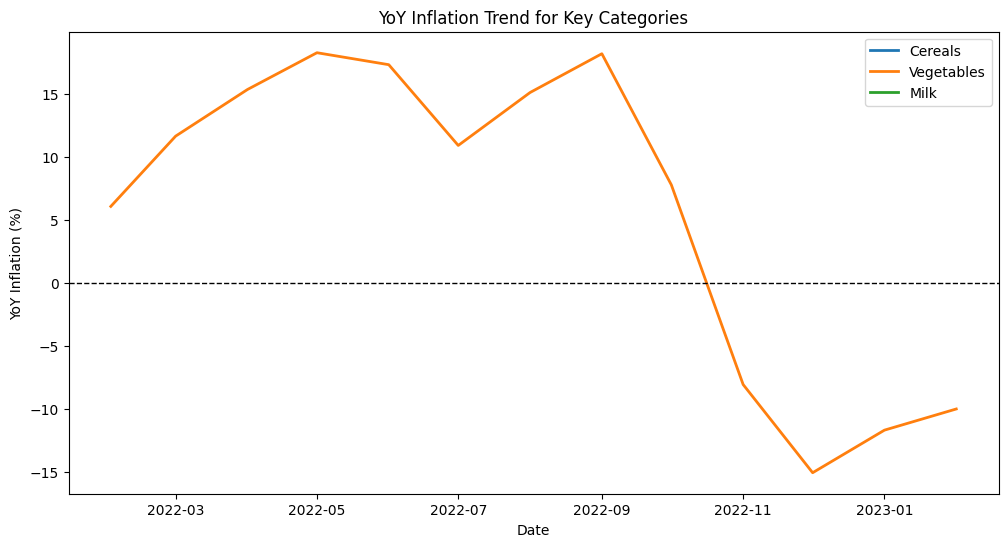

In [64]:
key_cats = ["Cereals", "Vegetables", "Milk"]

plt.figure(figsize=(12,6))
for cat in key_cats:
    subset = yoy_df[yoy_df["Category"] == cat]
    plt.plot(subset["Date"], subset["yoy_percent"], label=cat, linewidth=2)

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("YoY Inflation Trend for Key Categories")
plt.xlabel("Date")
plt.ylabel("YoY Inflation (%)")
plt.legend()
plt.savefig("Key_Categories.png", dpi=300, bbox_inches="tight")
plt.show()

In [50]:
plt.savefig(r"C:\Users\Admin\OneDrive\Desktop\Food_Inflation_Project\heatmap_inflation.png")

<Figure size 640x480 with 0 Axes>